# Take home task


In [1]:
# JFW: did not run this as I already have the required packages installed
#from google.colab import drive

Welcome to your take home task. Congrats on making it to the next stage. This task should take around 20 minutes. There are four stages:
* Stage 1: Data Cleaning
* Stage 2: Model Buliding
* Stage 3: Model Evaluation
* Stage 4: Data Visualisation

You will be using the titanic dataset to build a simple Logistic Regression Model and then evaluating the performance of your mode. Please make a copy of this notebook. Once you have completed the task submit your Notebook file via the Ashby submission link in the original email. If you incur any issues please contact your talent partner.
Good luck and have fun

# Stage 1: Data Cleaning

* Load the attatched dataset and clean the data
* You should drop any duplicates values
* You should drop any null values
* You should drop PassengerId, Name, SibSp, Ticket, Cabin, Embarked, Sex columns
* Below is an example of what your data should look like


All relevant libraries have been allready imported for you (please ensure that you have them installed)

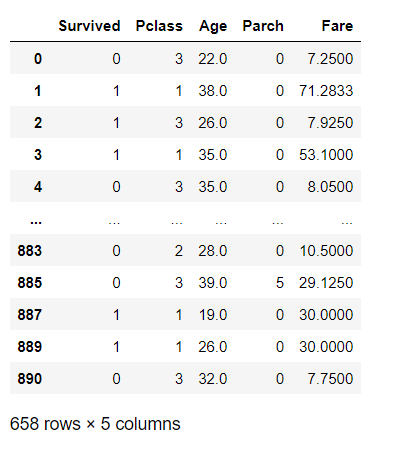

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [3]:
pip install gdown==v4.6.3

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [4]:
# downloading the dataset into /contents/ so it can be used for the exercise
# the filepath you can use is /content/titanic.csv to load your dataset
!gdown --id "1ZdhoVnOZIUs1X5qAja7hKQH-5QwYMmLE"

/Users/j.wagg/opt/anaconda3/lib/python3.8/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZdhoVnOZIUs1X5qAja7hKQH-5QwYMmLE
To: /Users/j.wagg/Multiverse/titanic.csv
100%|███████████████████████████████████████| 60.3k/60.3k [00:00<00:00, 363kB/s]


In [5]:
# read the dataset into a dataframe
df_tit = pd.read_csv('titanic.csv')
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# print some basic info about the dataframe
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains 891 rows (entries) and 12 columns. This dataset has been used for Kaggle competitions, and one can find the key on their website. The important model target variable is the Survived column which can either be 0, or 1. We can now check to see whether there are any missing data, or NaNs after we have dropped columns where the PassengerID is duplicated 

In [7]:
df_tit[df_tit.duplicated(['PassengerId'], keep=False)].copy()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There do not appear to be any duplicate passengers, and results are the same if we check the Name column.

In [8]:
df_tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Both the isnull() and isna() functions tell us that the Age, Cabin, and Embarked columns contain missing values. In order to deal with these, we can use the dropna() function to remove all entries that contain missing values. However, this would leave us with less than 200 rows for our model building and analysis. To handle these missing values, we can replace the numerical data with either the mean or median of the column, or the nearest non-zero value. For the missing string values, we can replace these with a new string, such as 'Unknown'. 

In [10]:
# We choose to replace all missing numerical values with the mean of the column, in this case Age 
df_tit_mean = df_tit.copy()
df_tit_mean.Age = df_tit_mean['Age'].fillna(df_tit_mean['Age'].mean())
df_tit_mean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Now replace the missing string values with 'Unknown'
df_tit_nonan = df_tit_mean.copy()
string_cols = ['Cabin','Embarked'] 
df_tit_nonan[string_cols] = df_tit_nonan[string_cols].fillna('Unknown')

df_tit_nonan.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now that the NaN values have been replaced, we can check some basic statistics of the dataframe columns. 

In [12]:
df_tit_nonan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_tit_nonan[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
female,28.216730
male,30.505824


Lets make some basic plots to check the survival rates and their dependance on various factors, like sex, the number of parents/children (parch), Age, ticket class (Pclass) and fare. 

Text(0.5, 1.0, 'Number of survivors by gender')

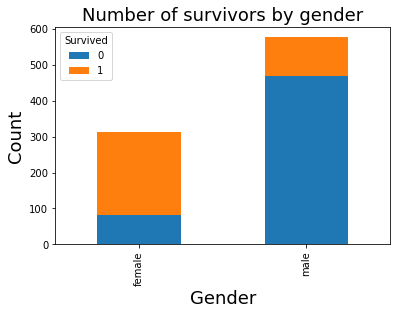

In [14]:
surv_sex_cts = df_tit_nonan.groupby(['Sex','Survived']).size().unstack() # count number of survivors by sex

# create the bar chart, set labels and title
ax = surv_sex_cts.plot(kind='bar', stacked=True)
ax.set_xlabel('Gender',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Number of survivors by gender',fontsize=18)

Text(0.5, 1.0, 'Number of survivors by number of parents/children onboard')

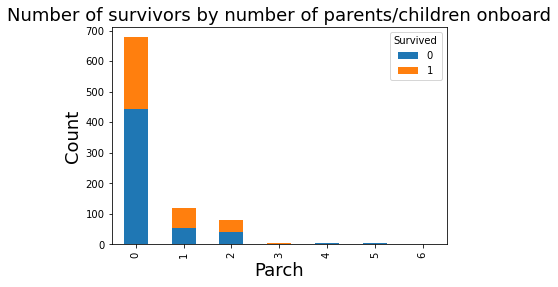

In [15]:
surv_parch_cts = df_tit_nonan.groupby(['Parch','Survived']).size().unstack() # count number of survivors by sex

# create the bar chart, set labels and title
ax = surv_parch_cts.plot(kind='bar', stacked=True)
ax.set_xlabel('Parch',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Number of survivors by number of parents/children onboard',fontsize=18)

Text(0.5, 1.0, 'Number of survivors in each class')

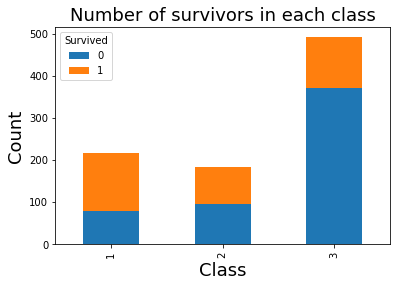

In [16]:
surv_pclass_cts = df_tit_nonan.groupby(['Pclass','Survived']).size().unstack() # count number of survivors by sex

# create the bar chart, set labels and title
ax = surv_pclass_cts.plot(kind='bar', stacked=True)
ax.set_xlabel('Class',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Number of survivors in each class',fontsize=18)

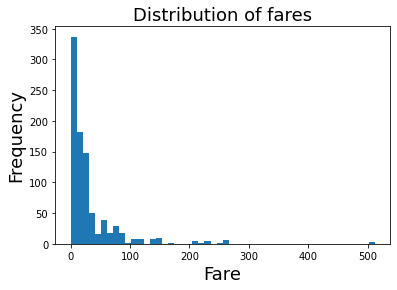

In [17]:
# create a histogram of the fares using matplotlib
plt.hist(df_tit_nonan.Fare, bins=50)

plt.xlabel('Fare', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of fares',fontsize=18)

plt.show()

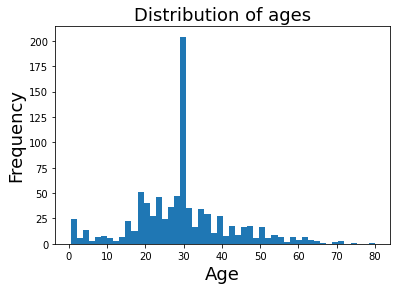

In [18]:
# create a histogram of the fares using matplotlib
plt.hist(df_tit_nonan.Age, bins=50)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of ages',fontsize=18)

plt.show()

Only potential bias observed in the data, which could impact our models, is the use of the mean age to replace all of the missing values in the age column. Finally, before the modelling we will drop the PassengerId, Name, SibSp, Ticket, Cabin, Embarked, and Sex columns. 

In [19]:
df_tit_drop = df_tit_nonan.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)

df_tit_drop.head()

,Survived,Pclass,Age,Parch,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500


# Stage 2: Model Building

* You will now build a simple Logistic Regression model using the sklearn library
* You should use the following columns as your features Pclass, Age, Parch, Fare for your X values
* The Y value should be the survived column


In [20]:
# Start by defining the columns that will be used as model features (X) and the target data (y)
features = ['Pclass', 'Age', 'Parch', 'Fare']

X = df_tit_drop[features]
y = df_tit_drop.Survived

In [21]:
# Now we want to split the data to create training (80%) and testing (20%) datasets 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [22]:
# now initilize and train the modelby fitting to the data
model_logreg =  LogisticRegression(solver='liblinear') 

model_logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

# Stage 3: Model Evaluation

* Check the score of your model for the train values
* Check the score of your model for the test values
* Produce a classification report for your y values



In [23]:
# beging my making predictions for survival (target) for the input test data
y_pred = model_logreg.predict(X_test) 

In [24]:
# Now calculate the accuracy, precision, and recall of the model
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)) 
print("Precision: ",metrics.precision_score(y_test, y_pred)) 
print("Recall: ",metrics.recall_score(y_test, y_pred)) 

Accuracy:  0.7374301675977654
Precision:  0.7647058823529411
Recall:  0.527027027027027


In [25]:
# Now generate the classification report 
print(classification_report(y_test, y_pred, target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.73      0.89      0.80       105
    Survived       0.76      0.53      0.62        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.71       179
weighted avg       0.74      0.74      0.73       179



# Stage 4: Data Visualisation

* Produce a confusion matrix for your model
* Plot a ROC curve for your model


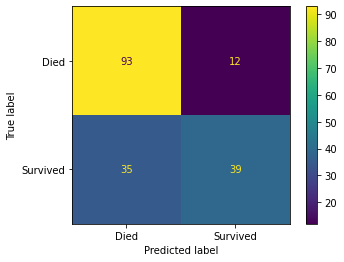

In [26]:
# now plot the confusion matrix
target_classes = ['Died', 'Survived']

conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = target_classes)
disp.plot()
plt.show()

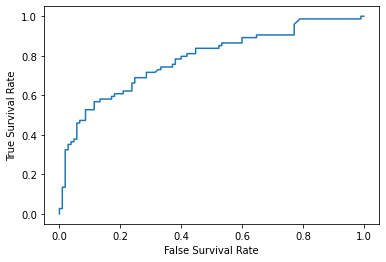

In [27]:
# Finally, plot the ROC curve for Survival probability
y_probab = model_logreg.predict_proba(X_test)[::,1]# predicted probabilities 
falseposrate, trueposrate, _ = roc_curve(y_test,  y_probab)
plt.plot(falseposrate, trueposrate)
plt.ylabel('True Survival Rate')
plt.xlabel('False Survival Rate')
plt.show()

We can see that the model generally performs well when trying to predict the probability of death, but does not perform as well when predicting chance of survival. 